# Proyek Ujian Tengah Semester - Deep Neural Network - Application

Dalam masa pandemi ini, CIT sangat menekankan mahasiswa untuk mematuhi prinsip 5M yaitu:
1. Memakai masker
2. Mencuci tangan
3. Menjaga jarak
4. Menjauhi kerumunan
5. Membatasi mobilitas.<br>

Hal ini bertujuan untuk menghindari penyebaran COVID-19 di dalam lingkungan civitas akademika CIT. Saya sebagai peserta kelas IBDA3311 diminta untuk berpartisipasi aktif dengan menggunakan ilmu yang sudah diperolah di kelas ini untuk membuat sebuah sistem yang dapat mendeteksi penggunaan masker berbasis deep learning. Tidak hanya membuat model saja, saya juga diminta untuk mendeploy model yang sudah dibuat di dalam suatu web page sehingga bisa diakses dengan menggunakan smartphone

## Table of Contents
- [1 - Packages](#1)
- [2 - Load and Process the Dataset](#2)
- [3 - Model Architecture](#3)
    - [3.1 - 2-layer Neural Network](#3-1)
    - [3.2 - L-layer Deep Neural Network](#3-2)
    - [3.3 - General Methodology](#3-3)
- [4 - Two-layer Neural Network](#4)
    - [Two_layer_model](#ex-1)
    - [4.1 - Train the model](#4-1)
- [5 - L-layer Neural Network](#5)
    - [L_layer_model](#ex-2)
    - [5.1 - Train the model](#5-1)
- [6 - Results Analysis](#6)
- [7 - Fine Tuning](#7)

<a name='1'></a>
## 1 - Packages

Diawali dengan meng-import semua packages yang akan saya butuhkan dalam mengerjakan proyek ini.

- [numpy](https://www.numpy.org/) adalah paket dasar yang dibutuhkan untuk komputasi ilmiah menggunakan Python.
- [matplotlib](http://matplotlib.org) adalah library untuk memplot grafik menggunakan Python.
- [h5py](http://www.h5py.org) adalah paket umum yang digunakan untuk berinteraksi dengan sekumpulan data yang disimpan pada file H5
- [PIL](http://www.pythonware.com/products/pil/) dan [scipy](https://www.scipy.org/) digunakan untuk menguji model saya dengan gambar saya sendiri di bagian akhir.
- `dnn_app_utils` menyediakan funsgi yang diterapkan dalam tugas "Membangun Deep Neural Network: Langkah demi Langkah" ke notebook ini.
- `np.random.seed(1)` digunakan untuk menjaga agar semua panggilan fungsi random() tetap konsisten. Ini membantu menilai pekerjaan Anda - jadi tolong jangan mengubahnya!

In [138]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import copy
import cv2
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Load and Process the Dataset

Disini saya akan menggunakan dataset "Mask vs Without Mask" yang dapat diunduh melalui https://www.kaggle.com/omkargurav/face-mask-dataset. Dalam dataset ini terdapat data yang merupakan kumpulan gambar atau foto dari orang-orang yang memakai masker dan juga orang yang tidak memakai masker. 

Kumpulan data yang akan digunakan ini nantinya akan dibagi menjadi:
1. Data Latih yang akan memuat data baik gambar-gambar orang yang menggunakan masker maupun tidak menggunakan masker. 
2. Data test yang memuat data yang sama (jenisnya sama) dengan data latih. Data ini nantinya akan digunakan untuk menguji keakuratan dari model yang akan saya buat. 
3. Setiap .shape gambar merupakan (num_px, num_px, 3) dimana 3 adalah untuk 3 channels warna (RGB).

Pertama-tama saya akan mencari tahu shape secara acak dari gambar-gambar yang saya miliki untuk mengetahui apakah semua shapenya sama.

In [139]:
img = cv2.imread('data\with_mask\with_mask_1.jpg')
dimensions = img.shape
dimensions

(350, 525, 3)

In [140]:
img = cv2.imread('data\with_mask\with_mask_48.jpg')
dimensions = img.shape
dimensions

(134, 103, 3)

Dari dua contoh yang kita ambil diatas, kita tahu bahwa gambar-gambar tersebut memiliki ukuran yang tidak sama sehingga saya memutuskan untuk langsung me-resizenya menjadi ukuran (255, 255, 3) ketika memuat data yang saya butuhkan. Setelah memuat data, maka saya membagi data yang telah ada menjadi data latih dan data test untuk keperluan dalam membuat model. 

In [141]:
path_of_input_image_classes = "data"
class_names = os.listdir(path_of_input_image_classes)
num_of_output_classes = len(class_names)
num_of_images_in_classes = []
image_list = []
output_classes = []

for dir in class_names:
    filenames = os.listdir(os.path.join(path_of_input_image_classes,dir))
    num_of_images_in_classes.append(len(filenames))

    for file in filenames:
        #image = Image.open(os.path.join(path_of_input_image_classes, dir, file))
        image = cv2.imread(os.path.join(path_of_input_image_classes, dir, file))
        image = cv2.resize(image,(64, 64))
        image_list.append(image)
        if dir == 'without_mask':
            output_classes.append(0)
        else:
            output_classes.append(1)

image_data = np.array(image_list)
output_classes = np.array(output_classes)

In [142]:
# Mendefinisikan kelas apa saja yang dimiliki oleh dataset ini.
class_names

['without_mask', 'with_mask']

In [143]:
# Memecah data menjadi data latih dan data test
x_train_orig, x_test_orig, y_train, y_test = train_test_split(image_data, output_classes)

Kode dibawah ini akan menunjuk contoh gambar dalam dataset yang saya miliki dan dapat anda run berulangkali sesuai yang anda butuhkan dan gambarnya dapat diganti melalui variabel indexnya.

y = 1. It's a with_mask picture.


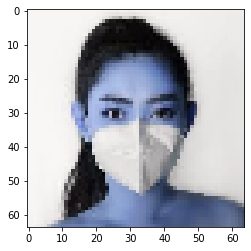

In [144]:
# Example of a picture
index = 15
plt.imshow(x_train_orig[index])
print ("y = " + str(y_train[index]) + ". It's a " + class_names[y_train[index]] +  " picture.")

In [145]:
# Explore your dataset 
m_train = x_train_orig.shape[0]
num_px = x_train_orig.shape[1]
m_test = x_test_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(x_train_orig.shape))
print ("train_y shape: " + str(y_train.shape[0]))
print ("test_x_orig shape: " + str(x_test_orig.shape))
print ("test_y shape: " + str(y_test.shape[0]))

Number of training examples: 5664
Number of testing examples: 1889
Each image is of size: (64, 64, 3)
train_x_orig shape: (5664, 64, 64, 3)
train_y shape: 5664
test_x_orig shape: (1889, 64, 64, 3)
test_y shape: 1889


Seperti biasa, Anda membentuk ulang dan menstandardisasi gambar sebelum memasukkannya ke jaringan. Kode diberikan dalam sel di bawah ini.

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Image to vector conversion.</font></center></caption>

In [146]:
# Reshape the training and test examples 
train_x_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 5664)
test_x's shape: (12288, 1889)


<a name='3'></a>
## 3 - Model Architecture

<a name='3-1'></a>
### 3.1 - 2-layer Neural Network

Sekarang, setelah Anda familiar dengan dataset yang ada, selanjutnya adalah untuk membangun deep neural network untuk membedakan mana gambar orang yang menggunakan masker dan orang yang tidak menggunakan masker!


Saya akan membangun 2 model yang berbeda:
- A 2-layer neural network
- An L-layer deep neural network

Kemudian, saya juga akan membandingkan performance dari kedua model ini, serta mencoba jumlah yang berbeda untuk $L$.

Mari kita lihat pada kedua arsitekturnya:

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center><font color='purple'><b>Figure 2</b>: 2-layer neural network. <br> Model ini dapat diringkas sebagai berikut: INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT.</font></center></caption>

<u><b>Detail dari Architecture pada Figure 2</b></u>:
- Inputnya adalah sebuah gambar dengan ukuran (64, 64, 3) yang telah di-flattened menjadi vector dengan ukuran $(195075,1)$.
- Sesuai dengan vector: $[x_0,x_1,...,x_{12287}]^T$ yang kemudian dikalikan dengan weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- Kemudian, tambahkan bias term dan terapkan relunya untuk mendapatkan vector berikut: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- Ulangi proses yang sama.
- Kalikan vector yang telah dihasilkan dengan $W^{[2]}$ dan tambahkan intercept (bias).
- Terakhir, terapkan fungsi sigmoed dari hasilnya. Jika hasilnya lebih besar dari 0.5, maka teridentifikasi sebagai orang yang memakai masker.

<a name='3-2'></a>
### 3.2 - L-layer Deep Neural Network

Cukup sulit untuk merepresentasikan jaringan saraf dalam lapisan-L menggunakan representasi di atas. Namun, berikut adalah representasi jaringan yang disederhanakan:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center><font color='purple'><b>Figure 3</b>: L-layer neural network. <br> Model ini dapat diringkas sebagai berikut: [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID</font></center></caption>

<u><b>Detail dari Architecture pada Figure 3</b></u>:
- Inputnya adalah gambar yang berukuran (64, 64, 3) yang telah di-flattened menjadi vector dengan ukurang (12288, 1).
- Sesuai dengan vector: $[x_0,x_1,...,x_{12287}]^T$ kemudian dikalikan dengan matriks bobot $W^{[1]}$ dan kemudian Anda menambahkan intersep $b^{[1 ]}$. Hasilnya disebut unit linier.
- Selanjutnya, terapkan relu dari satuan linier. Proses ini dapat diulang beberapa kali untuk setiap $(W^{[l]}, b^{[l]})$ tergantung pada arsitektur model.
- Terakhir, terapkan fungsi sigmoed dari hasilnya. Jika hasilnya lebih besar dari 0.5, maka teridentifikasi sebagai orang yang memakai masker.

<a name='3-3'></a>
### 3.3 - General Methodology

Seperti biasa, Anda akan mengikuti metodologi Deep Learning untuk membangun model:

1. Initialize parameters / Define hyperparameters
2. Loop untuk num_iterations:
    a. Forward propagation
    b. Compute cost function
    c. Backward propagation
    d. Update parameters (using parameters, and grads from backprop) 
3. Menggunakan parameters yang telah dilatih untuk memprediksi gambar.

Sekarang saya akan menerapkan kedua model diatas.

<a name='4'></a>
## 4 - Two-layer Neural Network

<a name='ex-1'></a>
### Two_layer_model 

Dengan menggunakan helper function yang sudah pernah saya implementasikan dalam tugas-tugas sebelumnya untuk membangun 2-layer neural network dengan struktur sebagai berikut: *LINEAR -> RELU -> LINEAR -> SIGMOID*. Fungsi-fungsi beserta inputnya sebagai berikut:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [147]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

### Activation Function

In [148]:
import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ



### Initialize Parameters

In [149]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

### Linear Activation Forward

In [150]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b

    cache = (A, W, b)
    
    return Z, cache

In [151]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

### Compute Cost

In [152]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[0]

    # Compute loss from aL and y.
    cost = - (1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

### Linear Activation Backward

In [153]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [154]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### Update Parameters

In [155]:
# GRADED FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters

### Two Layer Model

In [156]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    # np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # YOUR CODE ENDS HERE
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        #(approx. 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

<a name='4-1'></a>
### 4.1 - Train the model 

Saya akan menjalankan cell dibawah ini untuk melatih parameter-parameter saya.

- Nilai cost seharusnya berkurang pada setiap iterasi.

- Dapat memakan waktu selama kurang lebih 5 menit untuk menjalankan 2500 iterasi.

Cost after iteration 0: 0.693345517903106
Cost after iteration 100: 0.6899589801333541
Cost after iteration 200: 0.6730854440713502
Cost after iteration 300: 0.6145760702731357
Cost after iteration 400: 0.5156659955238083
Cost after iteration 500: 0.4385618593107784
Cost after iteration 600: 0.4909176318423064
Cost after iteration 700: 0.41779340851400315
Cost after iteration 800: 0.3934111141444051
Cost after iteration 900: 0.36987246057534456
Cost after iteration 1000: 0.3532676076259929
Cost after iteration 1100: 0.33946655996117586
Cost after iteration 1200: 0.32769058941412776
Cost after iteration 1300: 0.3168563706161599
Cost after iteration 1400: 0.30601395941696113
Cost after iteration 1500: 0.29629271759505266
Cost after iteration 1600: 0.29078485583437724
Cost after iteration 1700: 0.2802197417212736
Cost after iteration 1800: 0.27219138459676245
Cost after iteration 1900: 0.2682478919773013
Cost after iteration 2000: 0.2644755808487063
Cost after iteration 2100: 0.2596512321

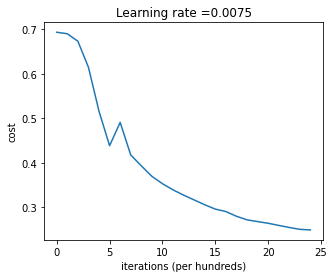

In [157]:
parameters, costs = two_layer_model(train_x, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

### Accuracy Value

In [158]:

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    prob, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, prob.shape[1]):
        if prob[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [159]:
predictions_train = predict(train_x, y_train, parameters)

Accuracy: 0.9016596045197742


In [160]:
predictions_test = predict(test_x, y_test, parameters)

Accuracy: 0.8925357331921651


Dari data diatas, dapat kita lihat bahwa besar akurasi yang telah didapatkan dari pelatihan model neural network untuk data latih sendiri adalah 90% sedangkan untuk data tes adalah 89%.

<a name='5'></a>
## 5 - L-layer Neural Network

<a name='ex-2'></a>
### L_layer_model 

Disini saya akan menggunakan fungsi-fungsi yang pernah buat sebelumnya untuk membangun $L$-layer neural network dengan struktur: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. Fungsi-fungsi dan inputnya adalah:

```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [49]:
### CONSTANTS DEFINING THE MODEL ####
layers_dims = [12288, 20, 7, 5, 1]  #  4-layer model

### Activation Function

In [50]:
import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1 + np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ



### Initialize Parameters With Deep Neural Network

In [63]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        # parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

### Linear Activation Forward

In [64]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b

    cache = (A, W, b)
    
    return Z, cache

In [65]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

### L Model Forward

In [66]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
          
    return AL, caches

### Compute Cost

In [67]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[0]

    # Compute loss from aL and y.
    cost = - (1 / m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

### Linear Activation Backward

In [68]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [69]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### L Model Backward

In [70]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation="sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]  
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### Update Parameters

In [71]:
# GRADED FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters

### L Layer Model

In [72]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

### Excecute The Model

Cost after iteration 0: 0.6973953920810543
Cost after iteration 100: 0.6532344453639599
Cost after iteration 200: 0.5998911316230188
Cost after iteration 300: 0.5648272068426338
Cost after iteration 400: 0.5279746149804344
Cost after iteration 500: 0.4927396511341322
Cost after iteration 600: 0.4634503304388136
Cost after iteration 700: 0.437122881934298
Cost after iteration 800: 0.41603925878864384
Cost after iteration 900: 0.3976311611864269
Cost after iteration 1000: 0.3816244066840833
Cost after iteration 1100: 0.36539409385532295
Cost after iteration 1200: 0.35296861308468747
Cost after iteration 1300: 0.3398217200022489
Cost after iteration 1400: 0.3285437371749669
Cost after iteration 1500: 0.3181724436013612
Cost after iteration 1600: 0.3072121540790486
Cost after iteration 1700: 0.3032481589342161
Cost after iteration 1800: 0.28673888624494037
Cost after iteration 1900: 0.2783387658832775
Cost after iteration 2000: 0.27849406602646504
Cost after iteration 2100: 0.2699657036234

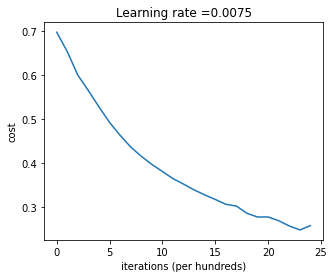

In [74]:
parameters, costs = L_layer_model(train_x, y_train, layers_dims, learning_rate=0.0075, num_iterations = 2500, print_cost = True)
plot_costs(costs, learning_rate=0.0075)

### Predict

In [133]:

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    prob, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, prob.shape[1]):
        if prob[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    # print("The number of wrong prediction: " + str(num_images))
    # will_printed = 10
    wrong_predicted_list = []
    for i in range(num_images):
        wrong_predicted_list.append(mislabeled_indices[1][i])

    return num_images, wrong_predicted_list

Dibawah ini merupakan perhitungan hasil pelatihan model yang telah saya lakukan. Dapat kita lihat bahwa hasil pelatihan model yang saya buat menurut data latih memiliki nilai akurasi sebesar 92% dan hasil prediksi dari data test memiliki nilai akurasi sebesar 89%. Selain itu, dari hasil prediksi data latih yang telah dilakukan, terdapat keseluruhan jumlah gambar yang salah diprediksi sebesar 192 gambar. Analisisnya akan disampaikan pada bagian berikutnya.

In [76]:
pred_train = predict(train_x, y_train, parameters)

Accuracy: 0.9228460451977403


In [77]:
pred_test = predict(test_x, y_test, parameters)

Accuracy: 0.8983589200635257


In [134]:
num_of_wp, wp_list = print_mislabeled_images(class_names, test_x, y_test, pred_test)
print("The number of wrong prediction: " + str(num_of_wp))

The number of wrong prediction: 192


<a name='6'></a>
##  6 - Analisis Hasil

Pertama, lihat beberapa gambar model L-layer berlabel salah. Ini akan menampilkan gambar yang salah label.

y = 0. It's a without_mask picture.
Prediction: with_mask
Class: without_mask


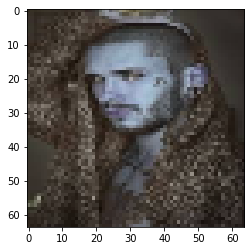

In [137]:
# Jika ingin melihat jenis gambar yang lain yang salah diprediksi, maka ganti index sesuai dengan angka-angka yang tertera diatas.
index = 5

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.imshow(x_test_orig[wp_list[index]])
print("y = " + str(y_test[wp_list[index]]) + ". It's a " + class_names[y_test[wp_list[index]]] +  " picture.")
print("Prediction: " + class_names[int(pred_test[0][wp_list[index]])] + "\nClass: " + class_names[y_test[wp_list[index]]])

**Beberapa jenis gambar yang cenderung buruk pada model termasuk:** 
- Orang yang memakai pakaian yang tidak biasanya (dari data banyak yang tidak memakai hoodie, tetapi ada orang yang memakai hoodie atau ada orang yang menggunakan sesuatu yang mirip dengan masker dikepalanya)
- Warna masker yang mungkin mirip dengan warna latar gambarnya.
- Posisi orang yang tidak biasa
- Posisi angle camera
- Cerah atau terangnya suatu gambar
- Scale variation (orang sangat kecil atau terlalu besar)

<a name='7'></a>
##  7 - Fine Tuning